In [1]:
#importing libraries
import os
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import warnings 
warnings.filterwarnings('ignore')
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from scipy.stats import shapiro
import math
import statsmodels.api as sm
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.metrics import r2_score

In [2]:
#changing default directory 
os.chdir(r'C:\Users\duela\Downloads')

In [3]:
#reading dataset
data = pd.read_csv('HousePrices.csv')
data.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


#### Summary Statistics

In [4]:
data = data.drop('Id', axis = 1)
data.describe()

,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
count,1460.000000,1201.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1452.000000,1460.000000,1460.000000,...,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000
mean,56.897260,70.049958,10516.828082,6.099315,5.575342,1971.267808,1984.865753,103.685262,443.639726,46.549315,...,94.244521,46.660274,21.954110,3.409589,15.060959,2.758904,43.489041,6.321918,2007.815753,180921.195890
std,42.300571,24.284752,9981.264932,1.382997,1.112799,30.202904,20.645407,181.066207,456.098091,161.319273,...,125.338794,66.256028,61.119149,29.317331,55.757415,40.177307,496.123024,2.703626,1.328095,79442.502883
min,20.000000,21.000000,1300.000000,1.000000,1.000000,1872.000000,1950.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000,34900.000000
25%,20.000000,59.000000,7553.500000,5.000000,5.000000,1954.000000,1967.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000,2007.000000,129975.000000
50%,50.000000,69.000000,9478.500000,6.000000,5.000000,1973.000000,1994.000000,0.000000,383.500000,0.000000,...,0.000000,25.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000,163000.000000
75%,70.000000,80.000000,11601.500000,7.000000,6.000000,2000.000000,2004.000000,166.000000,712.250000,0.000000,...,168.000000,68.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000,214000.000000
max,190.000000,313.000000,215245.000000,10.000000,9.000000,2010.000000,2010.000000,1600.000000,5644.000000,1474.000000,...,857.000000,547.000000,552.000000,508.000000,480.000000,738.000000,15500.000000,12.000000,2010.000000,755000.000000


In [5]:
#looking at summary statistics of target variable
data['SalePrice'].describe()

count      1460.000000
mean     180921.195890
std       79442.502883
min       34900.000000
25%      129975.000000
50%      163000.000000
75%      214000.000000
max      755000.000000
Name: SalePrice, dtype: float64

#### Inference: 
The minimum Sale Price of all houses is 34,900 units. 

The Average Sale Price is 1,80,921.19 units. 

The maximum Sale Price of all houses is 7,55,000 units. 

In [6]:
#information about each column
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 80 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   MSSubClass     1460 non-null   int64  
 1   MSZoning       1460 non-null   object 
 2   LotFrontage    1201 non-null   float64
 3   LotArea        1460 non-null   int64  
 4   Street         1460 non-null   object 
 5   Alley          91 non-null     object 
 6   LotShape       1460 non-null   object 
 7   LandContour    1460 non-null   object 
 8   Utilities      1460 non-null   object 
 9   LotConfig      1460 non-null   object 
 10  LandSlope      1460 non-null   object 
 11  Neighborhood   1460 non-null   object 
 12  Condition1     1460 non-null   object 
 13  Condition2     1460 non-null   object 
 14  BldgType       1460 non-null   object 
 15  HouseStyle     1460 non-null   object 
 16  OverallQual    1460 non-null   int64  
 17  OverallCond    1460 non-null   int64  
 18  YearBuil

In [7]:
pd.options.display.max_rows = None
pd.options.display.max_columns = None

In [8]:
#checking for missing values 
null_val = data.isnull().sum()
null_val.sort_values(ascending = False).head(20)

PoolQC          1453
MiscFeature     1406
Alley           1369
Fence           1179
FireplaceQu      690
LotFrontage      259
GarageYrBlt       81
GarageCond        81
GarageType        81
GarageFinish      81
GarageQual        81
BsmtExposure      38
BsmtFinType2      38
BsmtCond          37
BsmtQual          37
BsmtFinType1      37
MasVnrArea         8
MasVnrType         8
Electrical         1
MSSubClass         0
dtype: int64

In [9]:
#checking for total number of missing values 
print(data.isnull().values.sum())

6965


#### Since many columns have NA which do not mean a null value so we will calculate blanks to find actual missing values

In [10]:
print((data[['MiscFeature','Fence','PoolQC', 'GarageCond', 'GarageQual', 'GarageFinish', 'GarageType',
            'FireplaceQu', 'BsmtFinType2', 'BsmtFinType1', 'BsmtExposure', 'BsmtCond', 'BsmtQual', 'Alley']]  == '').sum())

MiscFeature     0
Fence           0
PoolQC          0
GarageCond      0
GarageQual      0
GarageFinish    0
GarageType      0
FireplaceQu     0
BsmtFinType2    0
BsmtFinType1    0
BsmtExposure    0
BsmtCond        0
BsmtQual        0
Alley           0
dtype: int64


In [11]:
print((data.columns == '').sum())

0


In [12]:
#making a function to deal with missing values
def cat_missing(column, value):
    data.loc[data[column].isnull(), column] = value


## Alley

In [13]:
#because NA in this column do not mean null values
cat_missing('Alley', 'None')
data['Alley'].value_counts()

None    1369
Grvl      50
Pave      41
Name: Alley, dtype: int64

In [14]:
data['Alley'].isnull().sum()

0

## LotFrontage

In [15]:
(data['LotFrontage'].isnull()).sum()

259

<AxesSubplot:xlabel='LotFrontage', ylabel='Density'>

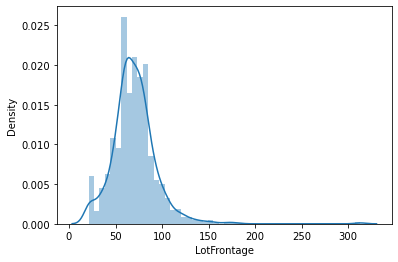

In [16]:
sns.distplot(data['LotFrontage'])

Inference: 
If the variable is skewed, then mean is biased towards the skewed values of the distribution. Use median in this case. 

In [17]:
median_1 = data['LotFrontage'].median()
cat_missing('LotFrontage', median_1)

In [18]:
data['LotFrontage'].isnull().sum()

0

## Basement

In [19]:
#segregating basement columns 
basement = data[['BsmtQual','BsmtCond','BsmtExposure','BsmtFinType1','BsmtFinType2','BsmtFinSF1',
                'BsmtFinSF2','BsmtUnfSF','TotalBsmtSF']][data['BsmtQual'].isnull()==True]

basement[data['BsmtQual'].isnull() == True]

,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinType2,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF
17,NaN,NaN,NaN,NaN,NaN,0,0,0,0
39,NaN,NaN,NaN,NaN,NaN,0,0,0,0
90,NaN,NaN,NaN,NaN,NaN,0,0,0,0
102,NaN,NaN,NaN,NaN,NaN,0,0,0,0
156,NaN,NaN,NaN,NaN,NaN,0,0,0,0
182,NaN,NaN,NaN,NaN,NaN,0,0,0,0
259,NaN,NaN,NaN,NaN,NaN,0,0,0,0
342,NaN,NaN,NaN,NaN,NaN,0,0,0,0
362,NaN,NaN,NaN,NaN,NaN,0,0,0,0
371,NaN,NaN,NaN,NaN,NaN,0,0,0,0


In [20]:
#count the number of observations where there is no basement
(basement.isnull() == True).count()

BsmtQual        37
BsmtCond        37
BsmtExposure    37
BsmtFinType1    37
BsmtFinType2    37
BsmtFinSF1      37
BsmtFinSF2      37
BsmtUnfSF       37
TotalBsmtSF     37
dtype: int64

In [21]:
data['BsmtQual'].isnull().value_counts()

False    1423
True       37
Name: BsmtQual, dtype: int64

Inference: 
We can see that where there is no basement in categorical columns, the numerical columns for basement is 0 as well. 

In [22]:
#substituting NA values in Garage with None and 0
for col in basement: 
    if data[col].dtype == np.object: 
        cat_missing(col, 'None')
    else: 
        cat_missing(col, 0)

In [23]:
(data['BsmtFinSF1'].isnull() == True).sum()

0

## MasVnr

In [24]:
#comparing Masonry Veneer Type and Area
data[['MasVnrType', 'MasVnrArea']][data['MasVnrType'].isnull() == True]

,MasVnrType,MasVnrArea
234,NaN,NaN
529,NaN,NaN
650,NaN,NaN
936,NaN,NaN
973,NaN,NaN
977,NaN,NaN
1243,NaN,NaN
1278,NaN,NaN


In [25]:
#since there are ONLY 8 values with no Mason Veneer, we will fill them with mode 
#since it is a categorical variable
data['MasVnrType'].value_counts()

None       864
BrkFace    445
Stone      128
BrkCmn      15
Name: MasVnrType, dtype: int64

In [26]:
#filling the missing 8 columns 
cat_missing('MasVnrType', 'None')
cat_missing('MasVnrArea', 0)

In [27]:
data['MasVnrType'].isnull().sum()

0

## Fireplace

In [28]:
#looking at the Fireplace column
data['FireplaceQu'].value_counts()

Gd    380
TA    313
Fa     33
Ex     24
Po     20
Name: FireplaceQu, dtype: int64

There are 690 more observations that are unaccounted for in the above cell. These are the NA observations which simply mean NO FIREPLACE 

In [29]:
#checking if above inference is true
data['FireplaceQu'].isnull().sum()

690

Hence our assumption is correct. So we replace these NA values with None.

In [30]:
#using predefined function
cat_missing('FireplaceQu', 'None')
#looking at the count of each levels
data['FireplaceQu'].value_counts()

None    690
Gd      380
TA      313
Fa       33
Ex       24
Po       20
Name: FireplaceQu, dtype: int64

In [31]:
#checking if the number of fireplaces in the Fireplace column is the same as
#No fireplace in FireplaceQu column
data['Fireplaces'].value_counts()

0    690
1    650
2    115
3      5
Name: Fireplaces, dtype: int64

## Garage

In [32]:
#first replace missing values with the current year to get age of garage as 0. 
cat_missing('GarageYrBlt',2021)

In [33]:
data['GarageYrBlt']

0       2003.0
1       1976.0
2       2001.0
3       1998.0
4       2000.0
5       1993.0
6       2004.0
7       1973.0
8       1931.0
9       1939.0
10      1965.0
11      2005.0
12      1962.0
13      2006.0
14      1960.0
15      1991.0
16      1970.0
17      1967.0
18      2004.0
19      1958.0
20      2005.0
21      1930.0
22      2002.0
23      1976.0
24      1968.0
25      2007.0
26      2005.0
27      2008.0
28      1957.0
29      1920.0
30      1920.0
31      1966.0
32      2007.0
33      1959.0
34      2005.0
35      2004.0
36      1995.0
37      1954.0
38      1953.0
39      2021.0
40      1965.0
41      1959.0
42      1983.0
43      1977.0
44      1959.0
45      2005.0
46      2003.0
47      2006.0
48      2021.0
49      1966.0
50      1997.0
51      1985.0
52      1963.0
53      1981.0
54      1962.0
55      1964.0
56      1999.0
57      2004.0
58      2006.0
59      1973.0
60      2006.0
61      1935.0
62      2006.0
63      1990.0
64      1998.0
65      2004.0
66      19

Since we cannot replace the year built of garage with 0, we make a new column to find the age of that garage

In [34]:
#adding a new column for garage age
data['GarageAge'] = 2021.0 - data['GarageYrBlt']
data['GarageAge']

0        18.0
1        45.0
2        20.0
3        23.0
4        21.0
5        28.0
6        17.0
7        48.0
8        90.0
9        82.0
10       56.0
11       16.0
12       59.0
13       15.0
14       61.0
15       30.0
16       51.0
17       54.0
18       17.0
19       63.0
20       16.0
21       91.0
22       19.0
23       45.0
24       53.0
25       14.0
26       16.0
27       13.0
28       64.0
29      101.0
30      101.0
31       55.0
32       14.0
33       62.0
34       16.0
35       17.0
36       26.0
37       67.0
38       68.0
39        0.0
40       56.0
41       62.0
42       38.0
43       44.0
44       62.0
45       16.0
46       18.0
47       15.0
48        0.0
49       55.0
50       24.0
51       36.0
52       58.0
53       40.0
54       59.0
55       57.0
56       22.0
57       17.0
58       15.0
59       48.0
60       15.0
61       86.0
62       15.0
63       31.0
64       23.0
65       17.0
66       51.0
67       18.0
68       76.0
69       68.0
70       48.0
71    

In [35]:
#segregating garage columns
garage = data[['GarageType','GarageFinish','GarageCars','GarageArea','GarageQual','GarageCond']]
garage[data['GarageType'].isnull() == True]

,GarageType,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond
39,NaN,NaN,0,0,NaN,NaN
48,NaN,NaN,0,0,NaN,NaN
78,NaN,NaN,0,0,NaN,NaN
88,NaN,NaN,0,0,NaN,NaN
89,NaN,NaN,0,0,NaN,NaN
99,NaN,NaN,0,0,NaN,NaN
108,NaN,NaN,0,0,NaN,NaN
125,NaN,NaN,0,0,NaN,NaN
127,NaN,NaN,0,0,NaN,NaN
140,NaN,NaN,0,0,NaN,NaN


Carrying out same steps as did previously for Basement

In [36]:
data = data.drop('GarageYrBlt', axis = 1)

### Inference: 
Hence we can see that for every categorical column where there is no Garage, the numerical columns for Garage is 0. 

In [37]:
#substituting NA values in Garage with None and 0
for col in garage: 
    if data[col].dtype == np.object: 
        cat_missing(col, 'None')
    else: 
        cat_missing(col, 0)

In [38]:
data['GarageType'].value_counts()

Attchd     870
Detchd     387
BuiltIn     88
None        81
Basment     19
CarPort      9
2Types       6
Name: GarageType, dtype: int64

In [39]:
(data['GarageType'].isnull() == True).sum()

0

## Electrical

In [40]:
data['Electrical'].value_counts()

SBrkr    1334
FuseA      94
FuseF      27
FuseP       3
Mix         1
Name: Electrical, dtype: int64

Since in Electrical almost 91% of the columns is filled with the type 'SBrkr', we will fill the one missing observation with the same. 

In [41]:
cat_missing('Electrical', 'SBrkr')

In [42]:
data['Electrical'].value_counts()

SBrkr    1335
FuseA      94
FuseF      27
FuseP       3
Mix         1
Name: Electrical, dtype: int64

## Pool

In [43]:
#looking at count of each level in Pool
data['PoolQC'].value_counts()

Gd    3
Fa    2
Ex    2
Name: PoolQC, dtype: int64

In [44]:
data['PoolQC'].isnull().sum()

1453

There are 1453 observations which do not have any pool. Hence the Pool Area will also be 0 for these observations.

In [45]:
(data['PoolArea'] == 0).sum()

1453

In [46]:
#substituting Pool Quality NA with None
cat_missing('PoolQC', 'None')

In [47]:
#looking at updated count of each level in Pool
data['PoolQC'].value_counts()

None    1453
Gd         3
Fa         2
Ex         2
Name: PoolQC, dtype: int64

In [48]:
data['PoolArea'].isnull().sum()

0

## Fence

In [49]:
#looking at count of each level in Fence
data['Fence'].value_counts()

MnPrv    157
GdPrv     59
GdWo      54
MnWw      11
Name: Fence, dtype: int64

In [50]:
#substituting Pool Quality NA with None
cat_missing('Fence', 'None')

In [51]:
#looking at updated count of each level in Fence
data['Fence'].value_counts()

None     1179
MnPrv     157
GdPrv      59
GdWo       54
MnWw       11
Name: Fence, dtype: int64

## MiscFeature

In [52]:
#looking at count of each level in Miscellaneous Feature
data['MiscFeature'].value_counts()

Shed    49
Gar2     2
Othr     2
TenC     1
Name: MiscFeature, dtype: int64

In [53]:
#substituting Pool Quality NA with None
cat_missing('MiscFeature', 'None')

In [54]:
#looking at updated count of each level in Fence
data['MiscFeature'].value_counts()

None    1406
Shed      49
Gar2       2
Othr       2
TenC       1
Name: MiscFeature, dtype: int64

## Year columns

Calculating Age for every 'year' column

In [55]:
data['Age_Since_Construction'] = 2021 - data['YearBuilt']
data['Age_Since_Remodel'] = 2021 - data['YearRemodAdd']
data['Age_Since_Sold'] = 2021 - data['YrSold']

In [56]:
#dropping corresponding year columns from data
data = data.drop(['YearBuilt', 'YearRemodAdd', 'YrSold'], axis = 1)

## Numeric columns which have sub classes

In [57]:
data[['MSSubClass','OverallQual','OverallCond','MoSold']] = data[['MSSubClass','OverallQual','OverallCond','MoSold']].astype(object)

In [58]:
#checking for any more null values
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 80 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   MSSubClass              1460 non-null   object 
 1   MSZoning                1460 non-null   object 
 2   LotFrontage             1460 non-null   float64
 3   LotArea                 1460 non-null   int64  
 4   Street                  1460 non-null   object 
 5   Alley                   1460 non-null   object 
 6   LotShape                1460 non-null   object 
 7   LandContour             1460 non-null   object 
 8   Utilities               1460 non-null   object 
 9   LotConfig               1460 non-null   object 
 10  LandSlope               1460 non-null   object 
 11  Neighborhood            1460 non-null   object 
 12  Condition1              1460 non-null   object 
 13  Condition2              1460 non-null   object 
 14  BldgType                1460 non-null   

## Checking if our dependent variable is normally distributed or not

<AxesSubplot:>

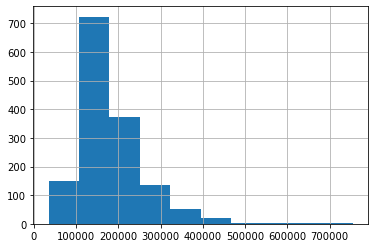

In [59]:
data['SalePrice'].hist()

In [60]:
sale = data['SalePrice']
stat, p = shapiro(sale)
print(stat,p)

0.869671642780304 3.206247534576162e-33


In [61]:
alpha = 0.05
if p  > alpha: 
    print('Sales Price is normal')
else: 
    print('Sales Price is not normal')

Sales Price is not normal


In [62]:
#applying log transformation to sales price
data['Log_salesprice'] = np.log(data['SalePrice'])

<AxesSubplot:>

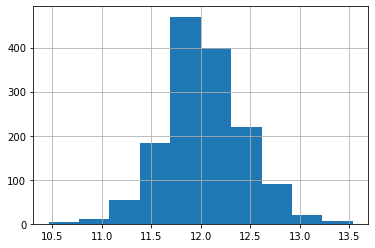

In [332]:
data['Log_salesprice'].hist()

In [333]:
logsale = data['Log_salesprice']
stat, p2 = shapiro(logsale)
print(stat, p2)


0.9912067651748657 1.1490678986092462e-07


In [334]:
alpha = 0.05
if p2  > alpha: 
    print('Log Sales Price is normal')
else: 
    print('Log Sales Price is not normal')

Log Sales Price is not normal





### Hence Log Sales Price and Sales Price is not normally distributed

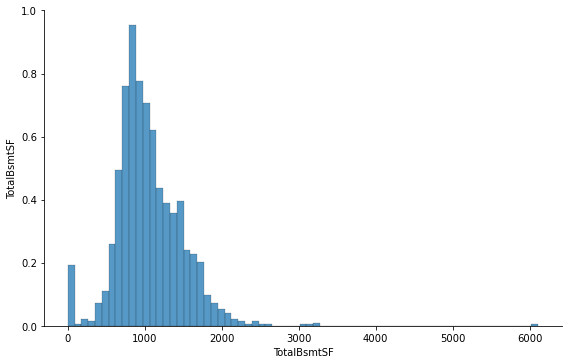

In [74]:
#fig_dims = (6,4)
#fig, ax = plt.subplots(figsize = fig_dims)
g = sns.pairplot(data[['BsmtQual', 'TotalBsmtSF']])
g.fig.set_size_inches(10,6)
plt.show()

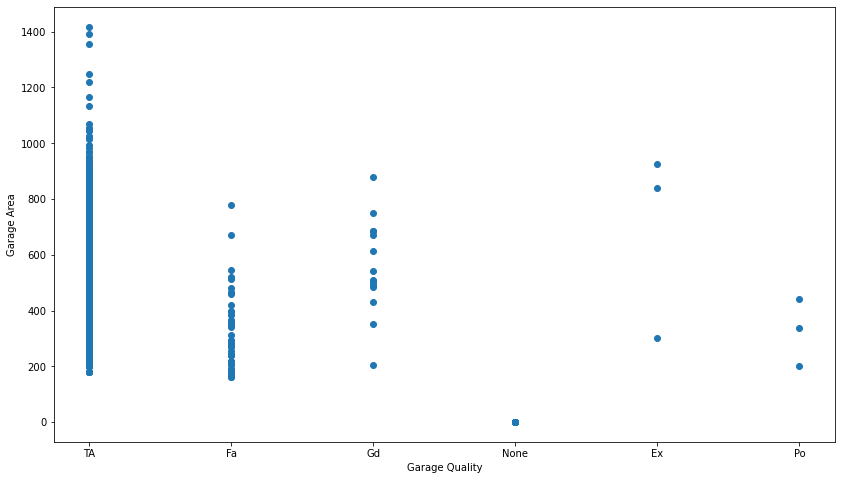

In [75]:
plt.figure(figsize = (14,8))
plt.scatter(data = data, x = 'GarageQual', y = 'GarageArea')
plt.xlabel('Garage Quality')
plt.ylabel('Garage Area')
plt.show()

Inference: 

TYPICAL/AVERAGE GARAGE QUALITY HAS THE MOST GARAGE AREA

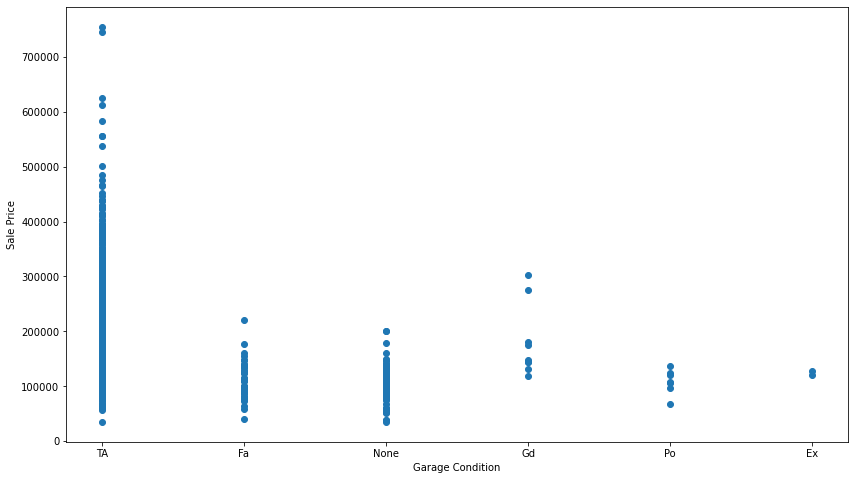

In [76]:
plt.figure(figsize = (14,8))
plt.scatter(data = data, x = 'GarageCond', y = 'SalePrice')
plt.xlabel('Garage Condition')
plt.ylabel('Sale Price')
plt.show()

Inference: 

FOR TYPICAL/AVERAGE CONDITION THE SALE PRICE IS HIGHEST 

## Scaling numeric columns

In [63]:
#extracting numeric columns
numeric_col = pd.DataFrame(data.select_dtypes(include = ['int64', 'float64']))
numeric_col.head()

,LotFrontage,LotArea,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,TotRmsAbvGrd,Fireplaces,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,SalePrice,GarageAge,Age_Since_Construction,Age_Since_Remodel,Age_Since_Sold,Log_salesprice
0,65.0,8450,196.0,706,0,150,856,856,854,0,1710,1,0,2,1,3,1,8,0,2,548,0,61,0,0,0,0,0,208500,18.0,18,18,13,12.247694
1,80.0,9600,0.0,978,0,284,1262,1262,0,0,1262,0,1,2,0,3,1,6,1,2,460,298,0,0,0,0,0,0,181500,45.0,45,45,14,12.109011
2,68.0,11250,162.0,486,0,434,920,920,866,0,1786,1,0,2,1,3,1,6,1,2,608,0,42,0,0,0,0,0,223500,20.0,20,19,13,12.317167
3,60.0,9550,0.0,216,0,540,756,961,756,0,1717,1,0,1,0,3,1,7,1,3,642,0,35,272,0,0,0,0,140000,23.0,106,51,15,11.849398
4,84.0,14260,350.0,655,0,490,1145,1145,1053,0,2198,1,0,2,1,4,1,9,1,3,836,192,84,0,0,0,0,0,250000,21.0,21,21,13,12.429216


In [65]:
#importing library for scaling
from sklearn.preprocessing import StandardScaler
scale = StandardScaler()

In [66]:
scaled_col = pd.DataFrame(scale.fit_transform(numeric_col), columns = numeric_col.columns)
scaled_col.head()

,LotFrontage,LotArea,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,TotRmsAbvGrd,Fireplaces,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,SalePrice,GarageAge,Age_Since_Construction,Age_Since_Remodel,Age_Since_Sold,Log_salesprice
0,-0.220875,-0.207142,0.514104,0.575425,-0.288653,-0.944591,-0.459303,-0.793434,1.161852,-0.120242,0.370333,1.107810,-0.241061,0.789741,1.227585,0.163779,-0.211454,0.912210,-0.951226,0.311725,0.351000,-0.752176,0.216503,-0.359325,-0.116339,-0.270208,-0.068692,-0.087688,0.347273,-0.855220,-1.050994,-0.878668,-0.138777,0.560068
1,0.460320,-0.091886,-0.570750,1.171992,-0.288653,-0.641228,0.466465,0.257140,-0.795163,-0.120242,-0.482512,-0.819964,3.948809,0.789741,-0.761621,0.163779,-0.211454,-0.318683,0.600495,0.311725,-0.060731,1.626195,-0.704483,-0.359325,-0.116339,-0.270208,-0.068692,-0.087688,0.007288,0.187906,-0.156734,0.429577,0.614439,0.212764
2,-0.084636,0.073480,0.325915,0.092907,-0.288653,-0.301643,-0.313369,-0.627826,1.189351,-0.120242,0.515013,1.107810,-0.241061,0.789741,1.227585,0.163779,-0.211454,-0.318683,0.600495,0.311725,0.631726,-0.752176,-0.070361,-0.359325,-0.116339,-0.270208,-0.068692,-0.087688,0.536154,-0.777952,-0.984752,-0.830215,-0.138777,0.734046
3,-0.447940,-0.096897,-0.570750,-0.499274,-0.288653,-0.061670,-0.687324,-0.521734,0.937276,-0.120242,0.383659,1.107810,-0.241061,-1.026041,-0.761621,0.163779,-0.211454,0.296763,0.600495,1.650307,0.790804,-0.752176,-0.176048,4.092524,-0.116339,-0.270208,-0.068692,-0.087688,-0.515281,-0.662049,1.863632,0.720298,1.367655,-0.437382
4,0.641972,0.375148,1.366489,0.463568,-0.288653,-0.174865,0.199680,-0.045611,1.617877,-0.120242,1.299326,1.107810,-0.241061,0.789741,1.227585,1.390023,-0.211454,1.527656,0.600495,1.650307,1.698485,0.780197,0.563760,-0.359325,-0.116339,-0.270208,-0.068692,-0.087688,0.869843,-0.739317,-0.951632,-0.733308,-0.138777,1.014651


In [67]:
scaled_col = scaled_col.drop(['Log_salesprice'], axis =1)

## Encoding Categorical Columns
We will encode using two methods, first n-1 dummy variable and binary encoding

In [68]:
cat = pd.DataFrame(data.select_dtypes(include = ['object']))
cat.head()

,MSSubClass,MSZoning,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinType2,Heating,HeatingQC,CentralAir,Electrical,KitchenQual,Functional,FireplaceQu,GarageType,GarageFinish,GarageQual,GarageCond,PavedDrive,PoolQC,Fence,MiscFeature,MoSold,SaleType,SaleCondition
0,60,RL,Pave,None,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,Gable,CompShg,VinylSd,VinylSd,BrkFace,Gd,TA,PConc,Gd,TA,No,GLQ,Unf,GasA,Ex,Y,SBrkr,Gd,Typ,None,Attchd,RFn,TA,TA,Y,None,None,None,2,WD,Normal
1,20,RL,Pave,None,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,6,8,Gable,CompShg,MetalSd,MetalSd,None,TA,TA,CBlock,Gd,TA,Gd,ALQ,Unf,GasA,Ex,Y,SBrkr,TA,Typ,TA,Attchd,RFn,TA,TA,Y,None,None,None,5,WD,Normal
2,60,RL,Pave,None,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,Gable,CompShg,VinylSd,VinylSd,BrkFace,Gd,TA,PConc,Gd,TA,Mn,GLQ,Unf,GasA,Ex,Y,SBrkr,Gd,Typ,TA,Attchd,RFn,TA,TA,Y,None,None,None,9,WD,Normal
3,70,RL,Pave,None,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,Norm,1Fam,2Story,7,5,Gable,CompShg,Wd Sdng,Wd Shng,None,TA,TA,BrkTil,TA,Gd,No,ALQ,Unf,GasA,Gd,Y,SBrkr,Gd,Typ,Gd,Detchd,Unf,TA,TA,Y,None,None,None,2,WD,Abnorml
4,60,RL,Pave,None,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,Norm,1Fam,2Story,8,5,Gable,CompShg,VinylSd,VinylSd,BrkFace,Gd,TA,PConc,Gd,TA,Av,GLQ,Unf,GasA,Ex,Y,SBrkr,Gd,Typ,TA,Attchd,RFn,TA,TA,Y,None,None,None,12,WD,Normal


In [69]:
dummy = pd.get_dummies(cat, drop_first = True)
dummy.head()

,MSSubClass_30,MSSubClass_40,MSSubClass_45,MSSubClass_50,MSSubClass_60,MSSubClass_70,MSSubClass_75,MSSubClass_80,MSSubClass_85,MSSubClass_90,MSSubClass_120,MSSubClass_160,MSSubClass_180,MSSubClass_190,MSZoning_FV,MSZoning_RH,MSZoning_RL,MSZoning_RM,Street_Pave,Alley_None,Alley_Pave,LotShape_IR2,LotShape_IR3,LotShape_Reg,LandContour_HLS,LandContour_Low,LandContour_Lvl,Utilities_NoSeWa,LotConfig_CulDSac,LotConfig_FR2,LotConfig_FR3,LotConfig_Inside,LandSlope_Mod,LandSlope_Sev,Neighborhood_Blueste,Neighborhood_BrDale,Neighborhood_BrkSide,Neighborhood_ClearCr,Neighborhood_CollgCr,Neighborhood_Crawfor,Neighborhood_Edwards,Neighborhood_Gilbert,Neighborhood_IDOTRR,Neighborhood_MeadowV,Neighborhood_Mitchel,Neighborhood_NAmes,Neighborhood_NPkVill,Neighborhood_NWAmes,Neighborhood_NoRidge,Neighborhood_NridgHt,Neighborhood_OldTown,Neighborhood_SWISU,Neighborhood_Sawyer,Neighborhood_SawyerW,Neighborhood_Somerst,Neighborhood_StoneBr,Neighborhood_Timber,Neighborhood_Veenker,Condition1_Feedr,Condition1_Norm,Condition1_PosA,Condition1_PosN,Condition1_RRAe,Condition1_RRAn,Condition1_RRNe,Condition1_RRNn,Condition2_Feedr,Condition2_Norm,Condition2_PosA,Condition2_PosN,Condition2_RRAe,Condition2_RRAn,Condition2_RRNn,BldgType_2fmCon,BldgType_Duplex,BldgType_Twnhs,BldgType_TwnhsE,HouseStyle_1.5Unf,HouseStyle_1Story,HouseStyle_2.5Fin,HouseStyle_2.5Unf,HouseStyle_2Story,HouseStyle_SFoyer,HouseStyle_SLvl,OverallQual_2,OverallQual_3,OverallQual_4,OverallQual_5,OverallQual_6,OverallQual_7,OverallQual_8,OverallQual_9,OverallQual_10,OverallCond_2,OverallCond_3,OverallCond_4,OverallCond_5,OverallCond_6,OverallCond_7,OverallCond_8,OverallCond_9,RoofStyle_Gable,RoofStyle_Gambrel,RoofStyle_Hip,RoofStyle_Mansard,RoofStyle_Shed,RoofMatl_CompShg,RoofMatl_Membran,RoofMatl_Metal,RoofMatl_Roll,RoofMatl_Tar&Grv,RoofMatl_WdShake,RoofMatl_WdShngl,Exterior1st_AsphShn,Exterior1st_BrkComm,Exterior1st_BrkFace,Exterior1st_CBlock,Exterior1st_CemntBd,Exterior1st_HdBoard,Exterior1st_ImStucc,Exterior1st_MetalSd,Exterior1st_Plywood,Exterior1st_Stone,Exterior1st_Stucco,Exterior1st_VinylSd,Exterior1st_Wd Sdng,Exterior1st_WdShing,Exterior2nd_AsphShn,Exterior2nd_Brk Cmn,Exterior2nd_BrkFace,Exterior2nd_CBlock,Exterior2nd_CmentBd,Exterior2nd_HdBoard,Exterior2nd_ImStucc,Exterior2nd_MetalSd,Exterior2nd_Other,Exterior2nd_Plywood,Exterior2nd_Stone,Exterior2nd_Stucco,Exterior2nd_VinylSd,Exterior2nd_Wd Sdng,Exterior2nd_Wd Shng,MasVnrType_BrkFace,MasVnrType_None,MasVnrType_Stone,ExterQual_Fa,ExterQual_Gd,ExterQual_TA,ExterCond_Fa,ExterCond_Gd,ExterCond_Po,ExterCond_TA,Foundation_CBlock,Foundation_PConc,Foundation_Slab,Foundation_Stone,Foundation_Wood,BsmtQual_Fa,BsmtQual_Gd,BsmtQual_None,BsmtQual_TA,BsmtCond_Gd,BsmtCond_None,BsmtCond_Po,BsmtCond_TA,BsmtExposure_Gd,BsmtExposure_Mn,BsmtExposure_No,BsmtExposure_None,BsmtFinType1_BLQ,BsmtFinType1_GLQ,BsmtFinType1_LwQ,BsmtFinType1_None,BsmtFinType1_Rec,BsmtFinType1_Unf,BsmtFinType2_BLQ,BsmtFinType2_GLQ,BsmtFinType2_LwQ,BsmtFinType2_None,BsmtFinType2_Rec,BsmtFinType2_Unf,Heating_GasA,Heating_GasW,Heating_Grav,Heating_OthW,Heating_Wall,HeatingQC_Fa,HeatingQC_Gd,HeatingQC_Po,HeatingQC_TA,CentralAir_Y,Electrical_FuseF,Electrical_FuseP,Electrical_Mix,Electrical_SBrkr,KitchenQual_Fa,KitchenQual_Gd,KitchenQual_TA,Functional_Maj2,Functional_Min1,Functional_Min2,Functional_Mod,Functional_Sev,Functional_Typ,FireplaceQu_Fa,FireplaceQu_Gd,FireplaceQu_None,FireplaceQu_Po,FireplaceQu_TA,GarageType_Attchd,GarageType_Basment,GarageType_BuiltIn,GarageType_CarPort,GarageType_Detchd,GarageType_None,GarageFinish_None,GarageFinish_RFn,GarageFinish_Unf,GarageQual_Fa,GarageQual_Gd,GarageQual_None,GarageQual_Po,GarageQual_TA,GarageCond_Fa,GarageCond_Gd,GarageCond_None,GarageCond_Po,GarageCond_TA,PavedDrive_P,PavedDrive_Y,PoolQC_Fa,PoolQC_Gd,PoolQC_None,Fence_GdWo,Fence_MnPrv,Fence_MnWw,Fence_None,MiscFeature_None,MiscFeature_Othr,MiscFeature_Shed,MiscFeature_TenC,MoSold_2,MoSold_3,MoSold_4,MoSold_5,MoSold_6,MoSold_7,MoSold_8,MoSold_9,MoSold_10,MoSold_11,MoSold_12,SaleTy

In [70]:
mod = pd.concat([scaled_col, dummy], axis = 1)

In [71]:
#assigning values to the indep and dependent variables
x1 = mod.drop(['SalePrice'],axis=1)
x1 = sm.add_constant(x1)
y1 = mod[['SalePrice']]

In [72]:
#Pass x_train, y_train to linear regression function
x1_train,x1_test,y1_train,y1_test=train_test_split(x1,y1,test_size=0.2,random_state = 45)

In [73]:
#use sm.OLS function to build the linear regression model
#need to pass x_train and y_train to this function
model1=sm.OLS(y1_train,x1_train)
model1
#fitting and summary of model
fitted_model1=model1.fit()
print(fitted_model1.summary())

                            OLS Regression Results                            
Dep. Variable:              SalePrice   R-squared:                       0.938
Model:                            OLS   Adj. R-squared:                  0.918
Method:                 Least Squares   F-statistic:                     47.18
Date:                Tue, 13 Jul 2021   Prob (F-statistic):               0.00
Time:                        00:42:22   Log-Likelihood:                -27.967
No. Observations:                1168   AIC:                             625.9
Df Residuals:                     883   BIC:                             2069.
Df Model:                         284                                         
Covariance Type:            nonrobust                                         
                             coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------
const                     -9

In [74]:
#Fitting the model
reg1 = LinearRegression().fit(x1_train,y1_train)

In [75]:
y1_test_predicted=reg1.predict(x1_test)
y1_test_predicted[:5]

array([[-0.10083771],
       [-0.88298035],
       [ 1.71195984],
       [ 1.25096893],
       [ 0.86508942]])

In [76]:
y1_train_predicted=reg1.predict(x1_train)
y1_train_predicted[:5]

array([[ 0.29163361],
       [-1.054245  ],
       [-0.51868439],
       [ 0.28456116],
       [-0.60762024]])

In [77]:
#Checking accuracy of test model
test1 = reg1.score(x1_test,y1_test)
test1

-3.3607344259249884e+18

In [78]:
#Checking accuracy of train model
train1 = reg1.score(x1_train,y1_train)
train1

0.9381717434983329

In [79]:
#Test
#Calculate RMSE 
test_mse1=mean_squared_error(y1_test,y1_test_predicted)
test_rmse1=math.sqrt(test_mse1)
test_rmse1

1856840351.5424087

In [80]:
#Train
#Calculate RMSE 
train_mse1=mean_squared_error(y1_train,y1_train_predicted)
train_rmse1=math.sqrt(train_mse1)
train_rmse1

0.24783970267756772

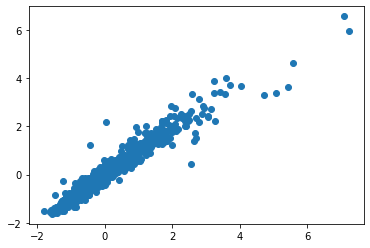

In [81]:
#Plot a scatter plot of predicted y and y_train
plt.figure(figsize = (6,4))
plt.scatter(y1_train,y1_train_predicted)
plt.show()

## Binary Encoding

In [82]:
import category_encoders as ce
encoder = ce.BinaryEncoder(cols = cat.columns)

In [83]:
nominal = cat[['MSZoning', 'Street', 'Alley', 'LotShape', 'LotShape', 'Utilities',
              'LotConfig', 'LandSlope', 'Neighborhood', 'Condition1', 'Condition2',
              'BldgType', 'HouseStyle', 'RoofStyle', 'RoofMatl', 'Exterior1st',
       'Exterior2nd', 'MasVnrType', 'Foundation', 'Heating','CentralAir', 'Electrical',
             'Functional', 'PavedDrive', 'MiscFeature', 'SaleType', 'SaleCondition']]

In [84]:
ordinal = cat[['ExterQual', 'ExterCond', 'BsmtQual', 'BsmtCond', 'BsmtExposure', 
               'BsmtFinType1', 'BsmtFinType2', 'HeatingQC', 'KitchenQual', 
              'FireplaceQu', 'GarageType', 'GarageFinish', 'GarageQual',
       'GarageCond', 'PoolQC', 'Fence']]

In [85]:
df_binary = encoder.fit_transform(cat)

In [86]:
df_binary.head()

,MSSubClass_0,MSSubClass_1,MSSubClass_2,MSSubClass_3,MSSubClass_4,MSZoning_0,MSZoning_1,MSZoning_2,MSZoning_3,Street_0,Street_1,Alley_0,Alley_1,Alley_2,LotShape_0,LotShape_1,LotShape_2,LandContour_0,LandContour_1,LandContour_2,Utilities_0,Utilities_1,LotConfig_0,LotConfig_1,LotConfig_2,LotConfig_3,LandSlope_0,LandSlope_1,LandSlope_2,Neighborhood_0,Neighborhood_1,Neighborhood_2,Neighborhood_3,Neighborhood_4,Neighborhood_5,Condition1_0,Condition1_1,Condition1_2,Condition1_3,Condition1_4,Condition2_0,Condition2_1,Condition2_2,Condition2_3,BldgType_0,BldgType_1,BldgType_2,BldgType_3,HouseStyle_0,HouseStyle_1,HouseStyle_2,HouseStyle_3,OverallQual_0,OverallQual_1,OverallQual_2,OverallQual_3,OverallQual_4,OverallCond_0,OverallCond_1,OverallCond_2,OverallCond_3,OverallCond_4,RoofStyle_0,RoofStyle_1,RoofStyle_2,RoofStyle_3,RoofMatl_0,RoofMatl_1,RoofMatl_2,RoofMatl_3,Exterior1st_0,Exterior1st_1,Exterior1st_2,Exterior1st_3,Exterior1st_4,Exterior2nd_0,Exterior2nd_1,Exterior2nd_2,Exterior2nd_3,Exterior2nd_4,MasVnrType_0,MasVnrType_1,MasVnrType_2,ExterQual_0,ExterQual_1,ExterQual_2,ExterCond_0,ExterCond_1,ExterCond_2,ExterCond_3,Foundation_0,Foundation_1,Foundation_2,Foundation_3,BsmtQual_0,BsmtQual_1,BsmtQual_2,BsmtQual_3,BsmtCond_0,BsmtCond_1,BsmtCond_2,BsmtCond_3,BsmtExposure_0,BsmtExposure_1,BsmtExposure_2,BsmtExposure_3,BsmtFinType1_0,BsmtFinType1_1,BsmtFinType1_2,BsmtFinType1_3,BsmtFinType2_0,BsmtFinType2_1,BsmtFinType2_2,BsmtFinType2_3,Heating_0,Heating_1,Heating_2,Heating_3,HeatingQC_0,HeatingQC_1,HeatingQC_2,HeatingQC_3,CentralAir_0,CentralAir_1,Electrical_0,Electrical_1,Electrical_2,Electrical_3,KitchenQual_0,KitchenQual_1,KitchenQual_2,Functional_0,Functional_1,Functional_2,Functional_3,FireplaceQu_0,FireplaceQu_1,FireplaceQu_2,FireplaceQu_3,GarageType_0,GarageType_1,GarageType_2,GarageType_3,GarageFinish_0,GarageFinish_1,GarageFinish_2,GarageQual_0,GarageQual_1,GarageQual_2,GarageQual_3,GarageCond_0,GarageCond_1,GarageCond_2,GarageCond_3,PavedDrive_0,PavedDrive_1,PavedDrive_2,PoolQC_0,PoolQC_1,PoolQC_2,Fence_0,Fence_1,Fence_2,Fence_3,MiscFeature_0,MiscFeature_1,MiscFeature_2,MiscFeature_3,MoSold_0,MoSold_1,MoSold_2,MoSold_3,MoSold_4,SaleType_0,SaleType_1,SaleType_2,SaleType_3,SaleType_4,SaleCondition_0,SaleCondition_1,SaleCondition_2,SaleCondition_3
0,0,0,0,0,1,0,0,0,1,0,1,0,0,1,0,0,1,0,0,1,0,1,0,0,0,1,0,0,1,0,0,0,0,0,1,0,0,0,0,1,0,0,0,1,0,0,0,1,0,0,0,1,0,0,0,0,1,0,0,0,0,1,0,0,0,1,0,0,0,1,0,0,0,0,1,0,0,0,0,1,0,0,1,0,0,1,0,0,0,1,0,0,0,1,0,0,0,1,0,0,0,1,0,0,0,1,0,0,0,1,0,0,0,1,0,0,0,1,0,0,0,1,0,1,0,0,0,1,0,0,1,0,0,0,1,0,0,0,1,0,0,0,1,0,0,1,0,0,0,1,0,0,0,1,0,0,1,0,0,1,0,0,0,1,0,0,0,1,0,0,0,0,1,0,0,0,0,1,0,0,0,1
1,0,0,0,1,0,0,0,0,1,0,1,0,0,1,0,0,1,0,0,1,0,1,0,0,1,0,0,0,1,0,0,0,0,1,0,0,0,0,1,0,0,0,0,1,0,0,0,1,0,0,1,0,0,0,0,1,0,0,0,0,1,0,0,0,0,1,0,0,0,1,0,0,0,1,0,0,0,0,1,0,0,1,0,0,1,0,0,0,0,1,0,0,1,0,0,0,0,1,0,0,0,1,0,0,1,0,0,0,1,0,0,0,0,1,0,0,0,1,0,0,0,1,0,1,0,0,0,1,0,1,0,0,0,0,1,0,0,1,0,0,0,0,1,0,0,1,0,0,0,1,0,0,0,1,0,0,1,0,0,1,0,0,0,1,0,0,0,1,0,0,0,1,0,0,0,0,0,1,0,0,0,1
2,0,0,0,0,1,0,0,0,1,0,1,0,0,1,0,1,0,0,0,1,0,1,0,0,0,1,0,0,1,0,0,0,0,0,1,0,0,0,0,1,0,0,0,1,0,0,0,1,0,0,0,1,0,0,0,0,1,0,0,0,0,1,0,0,0,1,0,0,0,1,0,0,0,0,1,0,0,0,0,1,0,0,1,0,0,1,0,0,0,1,0,0,0,1,0,0,0,1,0,0,0,1,0,0,1,1,0,0,0,1,0,0,0,1,0,0,0,1,0,0,0,1,0,1,0,0,0,1,0,0,1,0,0,0,1,0,0,1,0,0,0,0,1,0,0,1,0,0,0,1,0,0,0,1,0,0,1,0,0,1,0,0,0,1,0,0,0,1,0,0,0,1,1,0,0,0,0,1,0,0,0,1
3,0,0,0,1,1,0,0,0,1,0,1,0,0,1,0,1,0,0,0,1,0,1,0,0,1,1,0,0,1,0,0,0,0,1,1,0,0,0,0,1,0,0,0,1,0,0,0,1,0,0,0,1,0,0,0,0,1,0,0,0,0,1,0,0,0,1,0,0,0,1,0,0,0,1,1,0,0,0,1,1,0,1,0,0,1,0,0,0,0,1,0,0,1,1,0,0,1,0,0,0,1,0,0,0,0,1,0,0,1,0,0,0,0,1,0,0,0,1,0,0,1,0,0,1,0,0,0,1,0,0,1,0,0,0,1,0,0,1,1,0,0,1,0,0,1,0,0,0,0,1,0,0,0,1,0,0,1,0,0,1,0,0,0,1,0,0,0,1,0,0,0,0,1,0,0,0,0,1,0,0,1,0
4,0,0,0,0,1,0,0,0,1,0,1,0,0,1,0,1,0,0,0,1,0,1,0,0,1,0,0,0,1,0,0,0,1,0,0,0,0,0,0,1,0,0,0,1,0,0,0,1,0,0,0,1,0,0,0,1,1,0,0,0,0,1,0,0,0,1,0,0,0,1,0,0,0,0,1,0,0,0,0,1,0,0,1,0,0,1,0,0,0,1,0,0,0,1,0,0,0,1,0,0,0,1,0,1,0,0,0,0,0,1,0,0,0,1,0,0,0,1,0,0,0,1,0,

In [87]:
binary = pd.concat([scaled_col, df_binary], axis = 1)

In [88]:
binary.head()

,LotFrontage,LotArea,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,TotRmsAbvGrd,Fireplaces,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,SalePrice,GarageAge,Age_Since_Construction,Age_Since_Remodel,Age_Since_Sold,MSSubClass_0,MSSubClass_1,MSSubClass_2,MSSubClass_3,MSSubClass_4,MSZoning_0,MSZoning_1,MSZoning_2,MSZoning_3,Street_0,Street_1,Alley_0,Alley_1,Alley_2,LotShape_0,LotShape_1,LotShape_2,LandContour_0,LandContour_1,LandContour_2,Utilities_0,Utilities_1,LotConfig_0,LotConfig_1,LotConfig_2,LotConfig_3,LandSlope_0,LandSlope_1,LandSlope_2,Neighborhood_0,Neighborhood_1,Neighborhood_2,Neighborhood_3,Neighborhood_4,Neighborhood_5,Condition1_0,Condition1_1,Condition1_2,Condition1_3,Condition1_4,Condition2_0,Condition2_1,Condition2_2,Condition2_3,BldgType_0,BldgType_1,BldgType_2,BldgType_3,HouseStyle_0,HouseStyle_1,HouseStyle_2,HouseStyle_3,OverallQual_0,OverallQual_1,OverallQual_2,OverallQual_3,OverallQual_4,OverallCond_0,OverallCond_1,OverallCond_2,OverallCond_3,OverallCond_4,RoofStyle_0,RoofStyle_1,RoofStyle_2,RoofStyle_3,RoofMatl_0,RoofMatl_1,RoofMatl_2,RoofMatl_3,Exterior1st_0,Exterior1st_1,Exterior1st_2,Exterior1st_3,Exterior1st_4,Exterior2nd_0,Exterior2nd_1,Exterior2nd_2,Exterior2nd_3,Exterior2nd_4,MasVnrType_0,MasVnrType_1,MasVnrType_2,ExterQual_0,ExterQual_1,ExterQual_2,ExterCond_0,ExterCond_1,ExterCond_2,ExterCond_3,Foundation_0,Foundation_1,Foundation_2,Foundation_3,BsmtQual_0,BsmtQual_1,BsmtQual_2,BsmtQual_3,BsmtCond_0,BsmtCond_1,BsmtCond_2,BsmtCond_3,BsmtExposure_0,BsmtExposure_1,BsmtExposure_2,BsmtExposure_3,BsmtFinType1_0,BsmtFinType1_1,BsmtFinType1_2,BsmtFinType1_3,BsmtFinType2_0,BsmtFinType2_1,BsmtFinType2_2,BsmtFinType2_3,Heating_0,Heating_1,Heating_2,Heating_3,HeatingQC_0,HeatingQC_1,HeatingQC_2,HeatingQC_3,CentralAir_0,CentralAir_1,Electrical_0,Electrical_1,Electrical_2,Electrical_3,KitchenQual_0,KitchenQual_1,KitchenQual_2,Functional_0,Functional_1,Functional_2,Functional_3,FireplaceQu_0,FireplaceQu_1,FireplaceQu_2,FireplaceQu_3,GarageType_0,GarageType_1,GarageType_2,GarageType_3,GarageFinish_0,GarageFinish_1,GarageFinish_2,GarageQual_0,GarageQual_1,GarageQual_2,GarageQual_3,GarageCond_0,GarageCond_1,GarageCond_2,GarageCond_3,PavedDrive_0,PavedDrive_1,PavedDrive_2,PoolQC_0,PoolQC_1,PoolQC_2,Fence_0,Fence_1,Fence_2,Fence_3,MiscFeature_0,MiscFeature_1,MiscFeature_2,MiscFeature_3,MoSold_0,MoSold_1,MoSold_2,MoSold_3,MoSold_4,SaleType_0,SaleType_1,SaleType_2,SaleType_3,SaleType_4,SaleCondition_0,SaleCondition_1,SaleCondition_2,SaleCondition_3
0,-0.220875,-0.207142,0.514104,0.575425,-0.288653,-0.944591,-0.459303,-0.793434,1.161852,-0.120242,0.370333,1.107810,-0.241061,0.789741,1.227585,0.163779,-0.211454,0.912210,-0.951226,0.311725,0.351000,-0.752176,0.216503,-0.359325,-0.116339,-0.270208,-0.068692,-0.087688,0.347273,-0.855220,-1.050994,-0.878668,-0.138777,0,0,0,0,1,0,0,0,1,0,1,0,0,1,0,0,1,0,0,1,0,1,0,0,0,1,0,0,1,0,0,0,0,0,1,0,0,0,0,1,0,0,0,1,0,0,0,1,0,0,0,1,0,0,0,0,1,0,0,0,0,1,0,0,0,1,0,0,0,1,0,0,0,0,1,0,0,0,0,1,0,0,1,0,0,1,0,0,0,1,0,0,0,1,0,0,0,1,0,0,0,1,0,0,0,1,0,0,0,1,0,0,0,1,0,0,0,1,0,0,0,1,0,1,0,0,0,1,0,0,1,0,0,0,1,0,0,0,1,0,0,0,1,0,0,1,0,0,0,1,0,0,0,1,0,0,1,0,0,1,0,0,0,1,0,0,0,1,0,0,0,0,1,0,0,0,0,1,0,0,0,1
1,0.460320,-0.091886,-0.570750,1.171992,-0.288653,-0.641228,0.466465,0.257140,-0.795163,-0.120242,-0.482512,-0.819964,3.948809,0.789741,-0.761621,0.163779,-0.211454,-0.318683,0.600495,0.311725,-0.060731,1.626195,-0.704483,-0.359325,-0.116339,-0.270208,-0.068692,-0.087688,0.007288,0.187906,-0.156734,0.429577,0.614439,0,0,0,1,0,0,0,0,1,0,1,0,0,1,0,0,1,0,0,1,0,1,0,0,1,0,0,0,1,0,0,0,0,1,0,0,0,0,1,0,0,0,0,1,0,0,0,1,0,0,1,0,0,0,0,1,0,0,0,0,1,0,0,0,0,1,0,0,0,1,0,0,0,1,0,0,0,0,1,0,0,1,0,0,1,0,0,0,0,1,0,0,1,0,0,0,0,1,0,0,0,1,0,0,1,0,0,0,1,0,0,0,0,1,0,0,0,1,0,0,0,1,0,1,0,0,0,1,0,1,0,0,0,0,1,0,0,1,0,0,0,0,1,0,0,1,0,0,0,1,0,0,0,1,0,0,1,0,0,1,0,0,0,1

### Linear Regression model

In [89]:
x_1 = binary.drop(['SalePrice'], axis = 1)
y_1 = binary['SalePrice']

In [90]:
x1train, x1test, y1train, y1test = train_test_split(x_1,y_1, test_size = 0.3, random_state = 42)
x1train.head()

,LotFrontage,LotArea,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,TotRmsAbvGrd,Fireplaces,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,GarageAge,Age_Since_Construction,Age_Since_Remodel,Age_Since_Sold,MSSubClass_0,MSSubClass_1,MSSubClass_2,MSSubClass_3,MSSubClass_4,MSZoning_0,MSZoning_1,MSZoning_2,MSZoning_3,Street_0,Street_1,Alley_0,Alley_1,Alley_2,LotShape_0,LotShape_1,LotShape_2,LandContour_0,LandContour_1,LandContour_2,Utilities_0,Utilities_1,LotConfig_0,LotConfig_1,LotConfig_2,LotConfig_3,LandSlope_0,LandSlope_1,LandSlope_2,Neighborhood_0,Neighborhood_1,Neighborhood_2,Neighborhood_3,Neighborhood_4,Neighborhood_5,Condition1_0,Condition1_1,Condition1_2,Condition1_3,Condition1_4,Condition2_0,Condition2_1,Condition2_2,Condition2_3,BldgType_0,BldgType_1,BldgType_2,BldgType_3,HouseStyle_0,HouseStyle_1,HouseStyle_2,HouseStyle_3,OverallQual_0,OverallQual_1,OverallQual_2,OverallQual_3,OverallQual_4,OverallCond_0,OverallCond_1,OverallCond_2,OverallCond_3,OverallCond_4,RoofStyle_0,RoofStyle_1,RoofStyle_2,RoofStyle_3,RoofMatl_0,RoofMatl_1,RoofMatl_2,RoofMatl_3,Exterior1st_0,Exterior1st_1,Exterior1st_2,Exterior1st_3,Exterior1st_4,Exterior2nd_0,Exterior2nd_1,Exterior2nd_2,Exterior2nd_3,Exterior2nd_4,MasVnrType_0,MasVnrType_1,MasVnrType_2,ExterQual_0,ExterQual_1,ExterQual_2,ExterCond_0,ExterCond_1,ExterCond_2,ExterCond_3,Foundation_0,Foundation_1,Foundation_2,Foundation_3,BsmtQual_0,BsmtQual_1,BsmtQual_2,BsmtQual_3,BsmtCond_0,BsmtCond_1,BsmtCond_2,BsmtCond_3,BsmtExposure_0,BsmtExposure_1,BsmtExposure_2,BsmtExposure_3,BsmtFinType1_0,BsmtFinType1_1,BsmtFinType1_2,BsmtFinType1_3,BsmtFinType2_0,BsmtFinType2_1,BsmtFinType2_2,BsmtFinType2_3,Heating_0,Heating_1,Heating_2,Heating_3,HeatingQC_0,HeatingQC_1,HeatingQC_2,HeatingQC_3,CentralAir_0,CentralAir_1,Electrical_0,Electrical_1,Electrical_2,Electrical_3,KitchenQual_0,KitchenQual_1,KitchenQual_2,Functional_0,Functional_1,Functional_2,Functional_3,FireplaceQu_0,FireplaceQu_1,FireplaceQu_2,FireplaceQu_3,GarageType_0,GarageType_1,GarageType_2,GarageType_3,GarageFinish_0,GarageFinish_1,GarageFinish_2,GarageQual_0,GarageQual_1,GarageQual_2,GarageQual_3,GarageCond_0,GarageCond_1,GarageCond_2,GarageCond_3,PavedDrive_0,PavedDrive_1,PavedDrive_2,PoolQC_0,PoolQC_1,PoolQC_2,Fence_0,Fence_1,Fence_2,Fence_3,MiscFeature_0,MiscFeature_1,MiscFeature_2,MiscFeature_3,MoSold_0,MoSold_1,MoSold_2,MoSold_3,MoSold_4,SaleType_0,SaleType_1,SaleType_2,SaleType_3,SaleType_4,SaleCondition_0,SaleCondition_1,SaleCondition_2,SaleCondition_3
135,0.460320,-0.011709,1.023321,-0.973018,-0.288653,1.667950,0.562234,1.343941,-0.795163,-0.120242,0.317031,-0.819964,-0.241061,0.789741,-0.761621,0.163779,-0.211454,0.296763,0.600495,0.311725,0.266783,0.029973,-0.704483,-0.359325,-0.116339,-0.270208,-0.068692,-0.087688,0.419711,0.041991,0.720298,-0.138777,0,0,0,1,0,0,0,0,1,0,1,0,0,1,0,0,1,0,0,1,0,1,0,0,0,1,0,0,1,0,0,0,1,1,1,0,0,0,0,1,0,0,0,1,0,0,0,1,0,0,1,0,0,0,0,0,1,0,0,0,1,1,0,0,1,0,0,0,0,1,0,1,0,0,0,0,0,1,0,1,0,0,1,0,1,0,0,0,0,1,0,0,0,1,0,0,1,0,0,0,0,1,0,0,0,1,0,0,1,1,0,0,0,1,0,0,0,1,0,0,1,0,0,1,0,0,0,1,0,1,0,0,0,0,1,0,0,1,1,0,0,0,1,0,1,0,0,0,0,1,0,0,0,1,0,0,1,0,0,1,0,0,1,0,0,0,0,1,0,0,0,1,0,0,0,0,0,1,0,0,0,1
1452,-1.583265,-0.685702,-0.127953,0.226696,-0.288653,-1.284176,-1.163889,-0.234508,-0.795163,-0.120242,-0.844210,1.107810,-0.241061,-1.026041,-0.761621,-1.062465,-0.211454,-0.934130,-0.951226,0.311725,0.243389,-0.752176,-0.281735,-0.359325,-0.116339,-0.270208,-0.068692,-0.087688,-0.932489,-1.117235,-0.975575,1.367655,0,1,1,1,0,0,0,1,0,0,1,0,0,1,0,0,1,0,0,1,0,1,0,0,0,1,0,0,1,0,1,0,0,0,0,0,0,0,0,1,0,0,0,1,0,1,0,0,0,1,1,0,0,0,1,0,0,0,0,0,0,1,0,0,0,1,0,0,0,1,0,0,0,0,1,0,0,0,0,1,0,0,1,0,1,0,0,0,0,1,0,0,0,1,0,0,0,1,0,0,0,1,0,0,1,0,0,0,0,1,0,0,0,1,0,0,0,1,0,0,1,0,0,1,0,0,0,1,0,1,0,0,0,0,1,0,0,0,1,0,1,1,0,0,1,1,0,0,0,1,0,0,0,1,0,0,1,0,0,1,0,0,0,1,0,0,0,1,0,0,0,1,0,

In [91]:
x11 = sm.add_constant(x1train)
model1 = sm.OLS(y1train, x11)
fit1 = model1.fit()
print(fit1.summary())

                            OLS Regression Results                            
Dep. Variable:              SalePrice   R-squared:                       0.917
Model:                            OLS   Adj. R-squared:                  0.900
Method:                 Least Squares   F-statistic:                     53.67
Date:                Tue, 13 Jul 2021   Prob (F-statistic):               0.00
Time:                        00:42:49   Log-Likelihood:                -152.18
No. Observations:                1022   AIC:                             656.4
Df Residuals:                     846   BIC:                             1524.
Df Model:                         175                                         
Covariance Type:            nonrobust                                         
                             coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------
const                   4.02

In [92]:
reg1 = LinearRegression()
reg1.fit(x1train, y1train)

LinearRegression()

In [93]:
y1_pred = reg1.predict(x1test)
print(y1_pred[:5])

[-0.3407135   1.90132141 -1.11686707 -0.21627808  1.95536804]


In [94]:
y1trpred = reg1.predict(x1train)
print(y1trpred[:5])

[ 0.10343933 -0.64894104  0.51197052  1.68060303  0.53684998]


In [95]:
trainscore1 = reg1.score(x1train, y1train)
print(trainscore1)

0.9174281915219042


In [96]:
testscore1 = reg1.score(x1test, y1test)
print(testscore1)

-2.389541240297585e+16


In [97]:
mse_1 = mean_squared_error(y1test,y1_pred)
rmse_1 = math.sqrt(mse_1)
print(rmse_1)

162600369.788683


In [98]:
msetr_1 = mean_squared_error(y1train,y1trpred)
rmsetr_1 = math.sqrt(msetr_1)
print(rmsetr_1)

0.2807104737294237


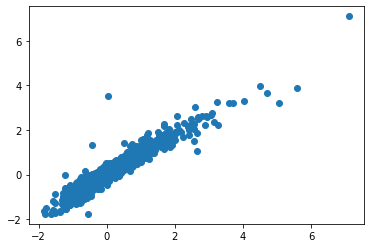

In [99]:
#Plot a scatter plot of predicted y and y_train
plt.figure(figsize = (6,4))
plt.scatter(y1train,y1trpred)
plt.show()

### Comparison of both encoding

In [100]:
compare1 = pd.DataFrame({'Linear Regression with': ['n-1 Dummy', 'Binary Encoding'],
                  'RMSE Train values': [train_mse1, rmsetr_1],
                  'RMSE Test values': [test_mse1, rmse_1]})
compare1

,Linear Regression with,RMSE Train values,RMSE Test values
0,n-1 Dummy,0.061425,3.447856e+18
1,Binary Encoding,0.280710,1.626004e+08


# Which encoding model is better

### Inference: 
Binary Encoding model is better as its Test RMSE is comparatively smaller than n-1 Dummy encoding model. 

# Linear Regression with Statistically significant variables

In [101]:
sig_cols = pd.DataFrame(fit1.pvalues[fit1.pvalues < 0.05], columns = ['pvalue'])
sig_cols['variable'] = sig_cols.index
new_var = sig_cols['variable'].to_list()

In [102]:
new_var

['LotArea',
 'MasVnrArea',
 'BedroomAbvGr',
 'KitchenAbvGr',
 'TotRmsAbvGrd',
 'GarageCars',
 'EnclosedPorch',
 'ScreenPorch',
 'PoolArea',
 'Age_Since_Construction',
 'Age_Since_Remodel',
 'MSZoning_2',
 'LotConfig_1',
 'Neighborhood_4',
 'Neighborhood_5',
 'Condition2_1',
 'Condition2_3',
 'OverallQual_2',
 'OverallQual_3',
 'OverallQual_4',
 'OverallCond_2',
 'OverallCond_4',
 'RoofStyle_1',
 'RoofMatl_0',
 'RoofMatl_1',
 'ExterQual_1',
 'ExterQual_2',
 'BsmtQual_2',
 'BsmtQual_3',
 'BsmtCond_1',
 'BsmtCond_2',
 'BsmtCond_3',
 'BsmtExposure_1',
 'BsmtExposure_3',
 'KitchenQual_0',
 'KitchenQual_1',
 'KitchenQual_2',
 'Functional_1',
 'Functional_2',
 'GarageQual_1',
 'SaleType_4']

In [111]:
#creating a dataframe with all statistically significant rows
stats_sig = binary[['LotArea','MasVnrArea','BedroomAbvGr','KitchenAbvGr','TotRmsAbvGrd','GarageCars','EnclosedPorch',
 'ScreenPorch','PoolArea','MSZoning_2','LotConfig_1','Neighborhood_4','Neighborhood_5','Condition2_1','Condition2_3','OverallQual_2',
 'OverallQual_3','OverallQual_4','OverallCond_2','OverallCond_4','RoofStyle_1','RoofMatl_0','RoofMatl_1','ExterQual_1',
 'ExterQual_2','BsmtQual_2','BsmtQual_3','BsmtCond_1','BsmtCond_2','BsmtCond_3','BsmtExposure_1','BsmtExposure_3',
 'KitchenQual_0','KitchenQual_1','KitchenQual_2','Functional_1','Functional_2','GarageQual_1','SaleType_4']]

In [112]:
#initializing X and Y for our prediction model
x_2 = stats_sig
y_2 = binary['SalePrice']
#checking X
#x.head()

In [113]:
#generate x_train, x_test, y_train,y_test 
x_train2, x_test2, y_train2, y_test2 = train_test_split(x_2, y_2, test_size = 0.3, random_state = 0)
#len(y_train2)
x_train2.head()

,LotArea,MasVnrArea,BedroomAbvGr,KitchenAbvGr,TotRmsAbvGrd,GarageCars,EnclosedPorch,ScreenPorch,PoolArea,MSZoning_2,LotConfig_1,Neighborhood_4,Neighborhood_5,Condition2_1,Condition2_3,OverallQual_2,OverallQual_3,OverallQual_4,OverallCond_2,OverallCond_4,RoofStyle_1,RoofMatl_0,RoofMatl_1,ExterQual_1,ExterQual_2,BsmtQual_2,BsmtQual_3,BsmtCond_1,BsmtCond_2,BsmtCond_3,BsmtExposure_1,BsmtExposure_3,KitchenQual_0,KitchenQual_1,KitchenQual_2,Functional_1,Functional_2,GarageQual_1,SaleType_4
64,-0.114436,2.600787,0.163779,-0.211454,0.912210,0.311725,-0.359325,-0.270208,-0.068692,0,0,0,1,0,1,0,0,1,0,1,0,0,0,1,0,0,1,0,0,1,0,1,0,0,1,0,0,0,1
682,-0.764677,-0.570750,-1.062465,-0.211454,-0.318683,0.311725,-0.359325,-0.270208,-0.068692,0,0,0,0,0,1,0,1,0,0,1,0,0,0,1,0,0,1,0,0,1,0,1,0,0,1,0,0,0,1
960,-0.331718,-0.570750,-1.062465,-0.211454,-1.549576,-2.365440,-0.359325,-0.270208,-0.068692,0,0,0,1,0,1,1,0,0,1,0,0,0,0,1,0,1,0,0,0,1,0,0,0,1,0,0,0,1,1
1384,-0.146006,-0.570750,-1.062465,-0.211454,-0.318683,-1.026858,-0.359325,-0.270208,-0.068692,0,0,0,0,0,1,0,1,0,0,1,0,0,0,1,0,1,0,0,0,1,0,1,0,1,0,0,0,0,1
1100,-0.212153,-0.570750,-2.288708,-0.211454,-2.165023,-1.026858,-0.359325,-0.270208,-0.068692,0,0,0,0,0,1,0,1,0,0,1,0,0,0,1,0,1,0,1,0,0,0,1,1,0,0,0,0,0,1


In [114]:
#performing linear regression 
reg2 = LinearRegression()
reg2.fit(x_train2, y_train2)

LinearRegression()

In [115]:
y_predicted2 = reg2.predict(x_test2)
print(y_predicted2[:5])

[-0.0929335  -0.80624176 -0.79375636  0.35421559 -0.75855421]


In [116]:
yt_predicted2 = reg2.predict(x_train2)
print(yt_predicted2[:5])

[ 0.72116131 -0.4101844  -0.74128521 -0.75890921 -1.39952979]


In [117]:
#checking accuracy of model
train_score2 = reg2.score(x_train2, y_train2)
print(train_score2)

0.8343717887391032


In [118]:
#checking accuracy of model
test_score2 = reg2.score(x_test2, y_test2)
print(test_score2)

0.7429273863785645


In [119]:
#comparing prediction and original y_test values
compare2 = pd.DataFrame({'Actual': y_test2, 'Predicted': y_predicted2})
compare2.head()

,Actual,Predicted
529,0.248098,-0.092934
491,-0.603425,-0.806242
459,-0.893042,-0.793756
279,0.139505,0.354216
655,-1.170067,-0.758554


In [120]:
#calculate rmse
mse_2 = mean_squared_error(y_test2, y_predicted2)
rmse_2 = math.sqrt(mse_2)
print(rmse_2)

0.5260492437638563


In [121]:
#calculate rmse
mset_2 = mean_squared_error(y_train2, yt_predicted2)
rmset_2 = math.sqrt(mset_2)
print(rmset_2)

0.4002388649427512


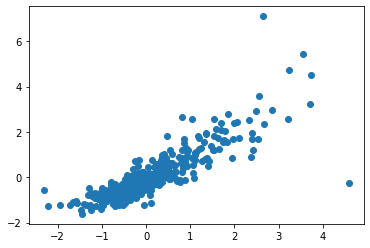

In [122]:
#plotting scatter plot between predicted y and y_test
plt.scatter(y_predicted2, y_test2)
plt.show()

# Linear Regression model only with statistically significant variables but removing multicollinearity using VIF

In [123]:
#creating dataframe to store VIF of columns
def calc_vif(x): 
    vif = pd.DataFrame()
    vif['features'] = x.columns
    vif['VIF'] = [variance_inflation_factor(x.values, i) for i in range(len(x.columns))]
    return(vif)

In [124]:
sig_vif = calc_vif(stats_sig)
sig_vif.sort_values('VIF', ascending = False)[:20]

,features,VIF
14,Condition2_3,126.056437
29,BsmtCond_3,73.825459
23,ExterQual_1,24.247603
24,ExterQual_2,17.387336
34,KitchenQual_2,15.887539
33,KitchenQual_1,15.660047
26,BsmtQual_3,14.208646
38,SaleType_4,12.775888
31,BsmtExposure_3,11.223761
25,BsmtQual_2,11.152433


### Inference: 
By calculating all the VIFs for statistically significant variables,  we will have to treat those variables whose VIFs are above 10. Below we can see that correlated variables have been combined to one and will be dropping the others. 

In [140]:
df = stats_sig.copy()
df['ExteriorQualDiff'] = stats_sig.apply(lambda x: x['ExterQual_1'] - x['ExterQual_2'], axis = 1)
df['KitchenQualDiff'] = stats_sig.apply(lambda x: x['KitchenQual_2'] - x['KitchenQual_1'], axis = 1)
df['BsmtnQualDiff'] = stats_sig.apply(lambda x: x['BsmtQual_3'] - x['BsmtQual_2'], axis = 1)

#Dropping all other columns with high VIF 
X = df.drop(['ExterQual_1', 'ExterQual_2', 'KitchenQual_2', 'KitchenQual_1','Condition2_3', 'BsmtCond_3', 'SaleType_4',
            'OverallCond_4', 'BsmtQual_3', 'BsmtQual_2', 'BsmtExposure_3'], axis = 1)
calc_vif(X).sort_values('VIF', ascending = False)

,features,VIF
4,TotRmsAbvGrd,2.760745
16,OverallQual_4,2.690615
28,ExteriorQualDiff,2.628124
5,GarageCars,2.620596
2,BedroomAbvGr,2.119302
20,RoofMatl_1,2.051327
14,OverallQual_2,2.039405
18,RoofStyle_1,2.030134
29,KitchenQualDiff,2.024364
12,Neighborhood_5,1.847416


## Model

In [143]:
#initializing X and Y for our prediction model
x_3 = X
y_3 = binary['SalePrice']
#checking X
#x.head()

In [144]:
#generate x_train, x_test, y_train,y_test 
x_train3, x_test3, y_train3, y_test3 = train_test_split(x_3, y_3, test_size = 0.3, random_state = 0)
#len(y_train2)
x_train3.head()

,LotArea,MasVnrArea,BedroomAbvGr,KitchenAbvGr,TotRmsAbvGrd,GarageCars,EnclosedPorch,ScreenPorch,PoolArea,MSZoning_2,LotConfig_1,Neighborhood_4,Neighborhood_5,Condition2_1,OverallQual_2,OverallQual_3,OverallQual_4,OverallCond_2,RoofStyle_1,RoofMatl_0,RoofMatl_1,BsmtCond_1,BsmtCond_2,BsmtExposure_1,KitchenQual_0,Functional_1,Functional_2,GarageQual_1,ExteriorQualDiff,KitchenQualDiff,BsmtnQualDiff
64,-0.114436,2.600787,0.163779,-0.211454,0.912210,0.311725,-0.359325,-0.270208,-0.068692,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1.0,1.0,1.0
682,-0.764677,-0.570750,-1.062465,-0.211454,-0.318683,0.311725,-0.359325,-0.270208,-0.068692,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1.0,1.0,1.0
960,-0.331718,-0.570750,-1.062465,-0.211454,-1.549576,-2.365440,-0.359325,-0.270208,-0.068692,0,0,0,1,0,1,0,0,1,0,0,0,0,0,0,0,0,0,1,1.0,-1.0,-1.0
1384,-0.146006,-0.570750,-1.062465,-0.211454,-0.318683,-1.026858,-0.359325,-0.270208,-0.068692,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1.0,-1.0,-1.0
1100,-0.212153,-0.570750,-2.288708,-0.211454,-2.165023,-1.026858,-0.359325,-0.270208,-0.068692,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,1,0,0,0,1.0,0.0,-1.0


In [145]:
#performing linear regression 
reg3 = LinearRegression()
reg3.fit(x_train3, y_train3)

LinearRegression()

In [146]:
y_predicted3 = reg3.predict(x_test3)
print(y_predicted3[:5])

[ 0.0106552  -1.11477808 -0.65508822  0.43393008 -0.67416041]


In [147]:
yt_predicted3 = reg3.predict(x_train3)
print(yt_predicted3[:5])

[ 0.99618408 -0.35830939 -1.13949721 -0.69420733 -1.43079803]


In [148]:
#checking accuracy of model
train_score3 = reg3.score(x_train3, y_train3)
print(train_score3)

0.7716706092439743


In [149]:
#checking accuracy of model
test_score3 = reg3.score(x_test3, y_test3)
print(test_score3)

0.7027809804744876


In [151]:
#comparing prediction and original y_test values
compare3 = pd.DataFrame({'Actual': y_test3, 'Predicted': y_predicted3})
compare3.head()

,Actual,Predicted
529,0.248098,0.010655
491,-0.603425,-1.114778
459,-0.893042,-0.655088
279,0.139505,0.433930
655,-1.170067,-0.674160


In [152]:
#calculate rmse
mse_3 = mean_squared_error(y_test3, y_predicted3)
rmse_3 = math.sqrt(mse_3)
print(rmse_3)

0.5656356747722963


In [153]:
#calculate rmse
mset_3 = mean_squared_error(y_train3, yt_predicted3)
rmset_3 = math.sqrt(mset_3)
print(rmset_3)

0.4699298272938705


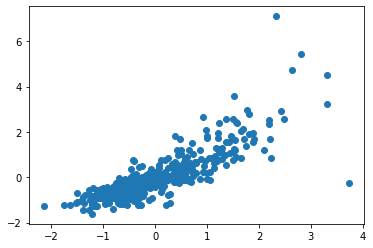

In [154]:
#plotting scatter plot between predicted y and y_test
plt.scatter(y_predicted3, y_test3)
plt.show()

# Linear Regression model without multicollinearity using Ridge and Lasso Regression
### Ridge regression

In [155]:
from sklearn.linear_model import Ridge
from sklearn.model_selection import GridSearchCV

In [214]:
#using same train and test data set as in the third case
x5 = x_3
y5 = binary[['SalePrice']]

In [215]:
#Pass x_train, y_train to linear regression function
x5_train,x5_test,y5_train,y5_test=train_test_split(x5,y5,test_size=0.2,random_state=0)

In [216]:
# Create an instance of Ridge Regression implementation
ridge = Ridge(alpha=0.0001)

In [217]:
# Fit the Ridge model
ridge.fit(x5_train, y5_train)

Ridge(alpha=0.0001)

In [218]:
y5_test_predicted=ridge.predict(x5_test)
y5_test_predicted[:5]

array([[-0.01021333],
       [-1.16756711],
       [-0.63989024],
       [ 0.40437538],
       [-0.65366392]])

In [219]:
y5_train_predicted=lasso.predict(x5_train)
y5_train_predicted[:5]

array([-0.00421791, -0.00421791, -0.00421791, -0.00421791, -0.00421791])

In [220]:
#Create the model score
test5 = ridge.score(x5_test, y5_test) 
test5

0.6755189480467165

In [222]:
train5 = ridge.score(x5_train, y5_train)
train5

0.7727927072233447

In [223]:
#Test
#Calculate RMSE 
test_mse5=mean_squared_error(y5_test,y5_test_predicted)
test_rmse5=math.sqrt(test_mse5)
test_rmse5

0.5960725240733942

In [224]:
#Train
#Calculate RMSE 
train_mse5=mean_squared_error(y5_train,y5_train_predicted)
train_rmse5=math.sqrt(train_mse5)
train_rmse5

0.9880542370887971

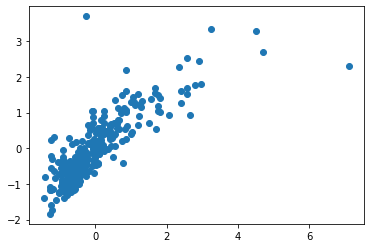

In [225]:
#Plot a scatter plot of predicted y and y_test
plt.figure(figsize = (6,4))
plt.scatter(y5_test,y5_test_predicted)
plt.show()

In [156]:
#using same train and test data set as in the third case

In [235]:
#low alpha, less restrictions on coefficients
ridge = Ridge(alpha = 0.01)

In [236]:
ridge.fit(x_train3, y_train3)

Ridge(alpha=0.01)

In [237]:
y_predicted4 = ridge.predict(x_test3)
print(y_predicted4[:5])

[ 0.01082989 -1.1147649  -0.65506203  0.43387228 -0.67413604]


In [238]:
yt_predicted4 = ridge.predict(x_train3)
print(yt_predicted4[:5])

[ 0.99611751 -0.35832266 -1.13954713 -0.69422559 -1.43086072]


In [239]:
#Set the different values of alpha to be tested
parameters = {"alpha":[1e-15, 1e-10, 1e-8, 1e-4, 1e-3, 1e-2, 1, 5, 10, 20]}

In [240]:
ridge_regression = GridSearchCV(ridge, parameters, scoring='neg_mean_squared_error', cv=5)
ridge_regression.fit(x_3, y_3)

GridSearchCV(cv=5, estimator=Ridge(alpha=0.01),
             param_grid={'alpha': [1e-15, 1e-10, 1e-08, 0.0001, 0.001, 0.01, 1,
                                   5, 10, 20]},
             scoring='neg_mean_squared_error')

In [242]:
#calculate rmse
mse_4 = mean_squared_error(y_test3, y_predicted4)
rmse_4 = math.sqrt(mse_4)
print(rmse_4)

0.5655926102884932


In [243]:
#calculate rmse
mset_4 = mean_squared_error(y_train3, yt_predicted4)
rmset_4 = math.sqrt(mset_4)
print(rmset_4)

0.46992985026220296


In [189]:
#checking accuracy of model
train_score4 = ridge.score(x_train3, y_train3)
print(train_score4)

0.7716706092417338


In [190]:
#checking accuracy of model
test_score4 = ridge.score(x_test3, y_test3)
print(test_score4)

0.7027814343931278


In [191]:
#checking accuracy of model
train_score5 = ridge100.score(x_train3, y_train3)
print(train_score5)

0.7416024740518206


In [192]:
#checking accuracy of model
test_score5 = ridge100.score(x_test3, y_test3)
print(test_score5)

0.6867962194881696


In [ ]:
plt.plot(ridge.coef_,alpha=0.7,linestyle='none',marker='*',markersize=5,color='red',label=r'Ridge; $\alpha = 0.01$',zorder=7)
plt.plot(ridge100.coef_,alpha=0.5,linestyle='none',marker='d',markersize=6,color='blue',label=r'Ridge; $\alpha = 100$') 
plt.xlabel('Coefficient Index',fontsize=16)
plt.ylabel('Coefficient Magnitude',fontsize=16)
plt.legend(fontsize=13,loc=4)
plt.show()

In [ ]:
print(ridge_regression.best_params_)
print(ridge_regression.best_score_)

### Lasso

In [244]:
from sklearn.linear_model import Lasso

In [259]:
#assigning values to the indep and dependent variables
x4 = x_3
y4 = binary[['SalePrice']]

In [260]:
#Pass x_train, y_train to linear regression function
x4_train,x4_test,y4_train,y4_test=train_test_split(x4,y4,test_size=0.2,random_state=0)

In [262]:
lasso = Lasso(alpha = 0.001)
lasso.fit(x4_train, y4_train)

Lasso(alpha=0.001)

In [263]:
y4_test_predicted=lasso.predict(x4_test)
y4_test_predicted[:5]

array([ 0.01297671, -1.12575442, -0.6459801 ,  0.4098249 , -0.64953374])

In [264]:
y4_train_predicted=lasso.predict(x4_train)
y4_train_predicted[:5]

array([ 2.19702164, -0.88456962, -0.35520606,  1.4446471 ,  0.71051894])

In [265]:
parameters = {"alpha":[1e-15, 1e-10, 1e-8, 1e-4, 1e-3, 1e-2, 1, 5, 10, 20]}
lasso_regression = GridSearchCV(lasso, parameters, 
                                scoring='neg_mean_squared_error', cv=5)
lasso_regression.fit(x_3, y_3)

GridSearchCV(cv=5, estimator=Lasso(alpha=0.001),
             param_grid={'alpha': [1e-15, 1e-10, 1e-08, 0.0001, 0.001, 0.01, 1,
                                   5, 10, 20]},
             scoring='neg_mean_squared_error')

In [266]:
#Create the model score
test4 = lasso.score(x4_test, y4_test) 
test4

0.6798323554862312

In [267]:
train4 = lasso.score(x4_train, y4_train)
train4

0.7718645952562416

In [268]:
#Test
#Calculate RMSE 
test_mse4=mean_squared_error(y4_test,y4_test_predicted)
test_rmse4=math.sqrt(test_mse4)
test_rmse4

0.5920973990336899

In [269]:
#Train
#Calculate RMSE 
train_mse4=mean_squared_error(y4_train,y4_train_predicted)
train_rmse4=math.sqrt(train_mse4)
train_rmse4

0.47192760409970025

In [249]:
print(lasso_regression.best_params_)
print(lasso_regression.best_score_)

{'alpha': 0.001}
-0.2663543564043935


In [250]:
#calculate rmse
mse_5 = mean_squared_error(y_test3, y_predicted5)
rmse_5 = math.sqrt(mse_5)
print(rmse_5)

1.0376200769660828


In [251]:
#calculate rmse
mset_5 = mean_squared_error(y_train3, yt_predicted5)
rmset_5 = math.sqrt(mset_5)
print(rmset_5)

0.983449587325541


In [206]:
lasso001 = Lasso(alpha=0.01, max_iter=10e5)
lasso001.fit(x_train3, y_train3)

Lasso(alpha=0.01, max_iter=1000000.0)

In [207]:
train_score001=lasso001.score(x_train3, y_train3)
test_score001=lasso001.score(x_train3, y_train3)
coeff_used001 = np.sum(lasso001.coef_!=0)

In [208]:
print("training score for alpha=0.01:", train_score001)
print("test score for alpha =0.01: ", test_score001)
print("number of features used: for alpha =0.01:", coeff_used001)

training score for alpha=0.01: 0.752096832369903
test score for alpha =0.01:  0.752096832369903
number of features used: for alpha =0.01: 17


In [209]:
lasso00001 = Lasso(alpha=0.0001, max_iter=10e5)
lasso00001.fit(x_train3, y_train3)
train_score00001=lasso00001.score(x_train3, y_train3)
test_score00001=lasso00001.score(x_train3, y_train3)
coeff_used00001 = np.sum(lasso00001.coef_!=0)

In [210]:
print("training score for alpha=0.0001:", train_score00001)
print("test score for alpha =0.0001: ", test_score00001)
print("number of features used: for alpha =0.0001:", coeff_used00001)


training score for alpha=0.0001: 0.7716618279130023
test score for alpha =0.0001:  0.7716618279130023
number of features used: for alpha =0.0001: 30


In [254]:
#assigning values to the indep and dependent variables
x4 = x_3
y4 = binary[['SalePrice']]

In [255]:
#Pass x_train, y_train to linear regression function
x4_train,x4_test,y4_train,y4_test=train_test_split(x4,y4,test_size=0.2,random_state=0)

In [256]:
# Create an instance of Lasso Regression implementation
lasso = Lasso(alpha=0.0001)

In [257]:
# Fit the Lasso model
lasso.fit(x4_train, y4_train)

Lasso(alpha=0.0001)

In [258]:
y4_test_predicted=lasso.predict(x4_test)
y4_test_predicted[:5]

array([-0.00789083, -1.16338507, -0.64051043,  0.40491925, -0.65325476])

## Creating a new dataframe to store RMSEs for all models

In [2]:
import pandas as pd

In [3]:
rmse = pd.DataFrame({'Linear Regression with': ['All variables', 'Statistically Significant', 'Removed Multicollinearity', 'Ridge', 'Lasso'],
                  'RMSE Train values': [0.9174, 0.8343, 0.776, 0.771, 0.752],
                  'RMSE Test values': [0.8439, 0.7912, 0.726, 0.702, 0.750]})

rmse

,Linear Regression with,RMSE Train values,RMSE Test values
0,All variables,0.9174,0.8439
1,Statistically Significant,0.8343,0.7912
2,Removed Multicollinearity,0.7760,0.7260
3,Ridge,0.7710,0.7020
4,Lasso,0.7520,0.7500


## Inference: 


In [ ]:
If RMSE of test > train, you've overfit slightly.